In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Importing dataset
df=pd.read_csv('dataset1.csv')


# Data Preprocessing and null values imputation
# Label Encoding
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()})


# Creating Train and Test Sets
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scalar_train= preprocessing.StandardScaler().fit(X_train)
scalar_test= preprocessing.StandardScaler().fit(X_test)
X_train = scalar_train.transform(X_train)
X_test = scalar_test.transform(X_test)


In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import tensorboard
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape = 11),
keras.layers.Dense(18, activation="relu"),
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(2, activation="sigmoid")])
model.save_weights("weights")

In [17]:
history = {}
model.load_weights("weights")
optimizer1 = keras.optimizers.SGD(lr=0.002)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer1,
metrics=["accuracy"])
history["SGD"] = model.fit(X_train , Y_train , epochs=80,validation_split=0.15 )
predict_mlp = model.predict_classes(X_test)
print(classification_report(predict_mlp , Y_test))

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
14/14 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.6667 - val_loss: 0.6065 - val_accuracy: 0.6892
Epoch 2/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.6667 - val_loss: 0.6055 - val_accuracy: 0.6892
Epoch 3/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6643 - val_loss: 0.6043 - val_accuracy: 0.6892
Epoch 4/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6667 - val_loss: 0.6031 - val_accuracy: 0.6892
Epoch 5/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6643 - val_loss: 0.6015 - val_accuracy: 0.6892
Epoch 6/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6619 - val_loss: 0.6005 - val_accuracy: 0.6892
Epoch 7/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6619 - val_loss: 0.5994 - val_accuracy: 0.6892
Epoch 8/80
14/14 [==

14/14 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6906 - val_loss: 0.5688 - val_accuracy: 0.7297
Epoch 60/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.6930 - val_loss: 0.5683 - val_accuracy: 0.7297
Epoch 61/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6930 - val_loss: 0.5679 - val_accuracy: 0.7297
Epoch 62/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.6930 - val_loss: 0.5674 - val_accuracy: 0.7297
Epoch 63/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6930 - val_loss: 0.5670 - val_accuracy: 0.7297
Epoch 64/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6954 - val_loss: 0.5665 - val_accuracy: 0.7297
Epoch 65/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6954 - val_loss: 0.5660 - val_accuracy: 0.7297
Epoch 66/80
14/14 [======

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model.load_weights("weights")
optimizer2 = keras.optimizers.RMSprop(lr=0.002, rho=0.9)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer2,
metrics=["accuracy"])
history["RMSprop"] = model.fit(X_train , Y_train , epochs= 80 , validation_split=0.15 )
predict_mlp = model.predict_classes(X_test)
print(classification_report(predict_mlp , Y_test))

Epoch 1/80
14/14 [==============================] - 0s 9ms/step - loss: 0.6768 - accuracy: 0.6619 - val_loss: 0.5744 - val_accuracy: 0.7027
Epoch 2/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6619 - val_loss: 0.5663 - val_accuracy: 0.7162
Epoch 3/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6811 - val_loss: 0.5548 - val_accuracy: 0.7297
Epoch 4/80
14/14 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6978 - val_loss: 0.5522 - val_accuracy: 0.7297
Epoch 5/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.6930 - val_loss: 0.5533 - val_accuracy: 0.7297
Epoch 6/80
14/14 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7002 - val_loss: 0.5486 - val_accuracy: 0.7297
Epoch 7/80
14/14 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7002 - val_loss: 0.5433 - val_accuracy: 0.7297
Epoch 8/80
14/14 [==

14/14 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7674 - val_loss: 0.5186 - val_accuracy: 0.7432
Epoch 60/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7626 - val_loss: 0.5203 - val_accuracy: 0.7568
Epoch 61/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7674 - val_loss: 0.5205 - val_accuracy: 0.7703
Epoch 62/80
14/14 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7746 - val_loss: 0.5172 - val_accuracy: 0.7568
Epoch 63/80
14/14 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7698 - val_loss: 0.5157 - val_accuracy: 0.7703
Epoch 64/80
14/14 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7746 - val_loss: 0.5201 - val_accuracy: 0.7432
Epoch 65/80
14/14 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7818 - val_loss: 0.5256 - val_accuracy: 0.7432
Epoch 66/80
14/14 [======

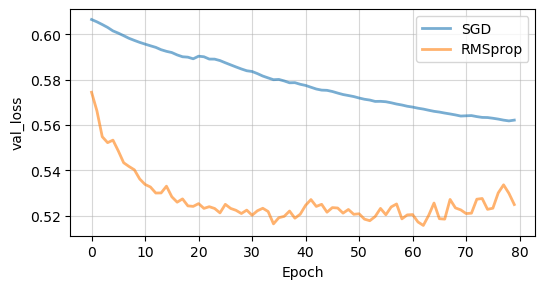

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
for key in history.keys():
    plt.plot(history[key].history["val_loss"] , lw=2, label=key, alpha=0.6)
    # plt.plot(history[key].history["val_loss"], lw=3, label=key, alpha=0.7, ls=':')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.savefig('val_loss.png', dpi=200)